# Moondream 3 (preview)
- Announcement: https://moondream.ai/blog/moondream-3-preview
- Playground: https://moondream.ai/c/playground
- Documentation: https://docs.moondream.ai/quickstart
- HuggingFace: https://huggingface.co/moondream/moondream3-preview

In [12]:
!pip install huggingface-hub

In [1]:
pip install "transformers>=4.51.1" "torch>=2.7.0" "accelerate>=1.10.0" "Pillow>=11.0.0"

In [49]:
from io import BytesIO
from IPython.display import Markdown # for displaying text in .md format
from PIL import Image, ImageDraw
import requests # for loading images from the web
import torch
from transformers import AutoModelForCausalLM

In [5]:
from google.colab import userdata
#userdata.get('HF_TOKEN')

In [2]:
from huggingface_hub import notebook_login
notebook_login()

In [4]:
# Load the model
model = AutoModelForCausalLM.from_pretrained(
    "moondream/moondream3-preview", #https://huggingface.co/moondream/moondream3-preview
    trust_remote_code=True,
    dtype=torch.bfloat16,
    device_map="cuda"
)

config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

hf_moondream.py:   0%|          | 0.00/5.58k [00:00<?, ?B/s]

region.py:   0%|          | 0.00/4.51k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/moondream/moondream3-preview:
- region.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


image_crops.py:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/moondream/moondream3-preview:
- image_crops.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vision.py:   0%|          | 0.00/5.09k [00:00<?, ?B/s]

layers.py:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/moondream/moondream3-preview:
- layers.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


config.py:   0%|          | 0.00/2.83k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/moondream/moondream3-preview:
- config.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/moondream/moondream3-preview:
- vision.py
- layers.py
- config.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


moondream.py:   0%|          | 0.00/38.2k [00:00<?, ?B/s]

text.py:   0%|          | 0.00/8.25k [00:00<?, ?B/s]

rope.py:   0%|          | 0.00/1.54k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/moondream/moondream3-preview:
- rope.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/moondream/moondream3-preview:
- text.py
- rope.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


utils.py:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/moondream/moondream3-preview:
- utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


lora.py:   0%|          | 0.00/2.30k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/moondream/moondream3-preview:
- lora.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/moondream/moondream3-preview:
- moondream.py
- text.py
- utils.py
- lora.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/moondream/moondream3-preview:
- hf_moondream.py
- region.py
- image_crops.py
- vision.py
- moondream.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/51.5k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.91G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.74G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.50G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/4.39G [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

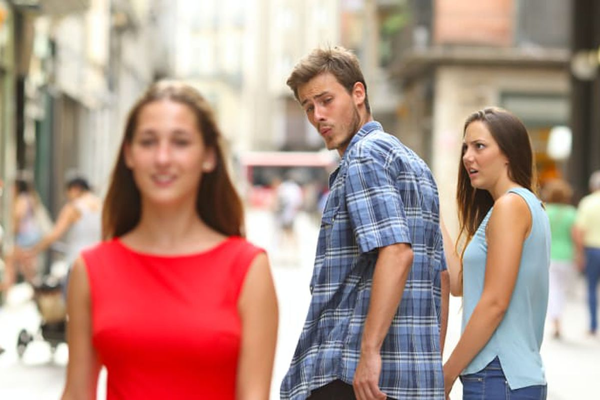

In [48]:
# Load image #1
url1 = "https://imgflip.com/s/meme/Distracted-Boyfriend.jpg"

response1 = requests.get(url1)

image1 = Image.open(BytesIO(response1.content))
width1, height1 = image1.size

display(image1.resize((width1 // 2, height1 // 2)))  # Resize width and height by 50%. display works in Google Colab

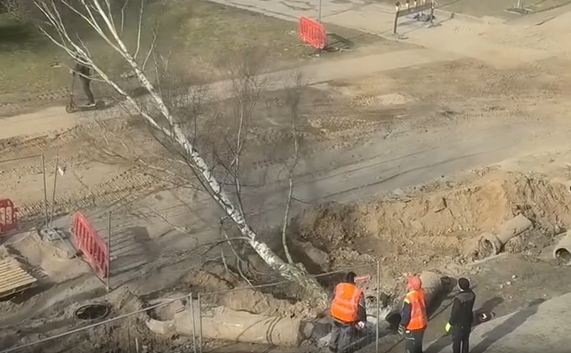

In [65]:
# Load image #2 (uploaded in the Colab)
# source: https://bauskasdzive.lv/vietejas-zinas/celu-buves-firma-skaidro-bistamo-starpgadijumu-bauska/ (video at 0:09)
image2 = Image.open('/content/celu_buve_Bauska.png')
width2, height2 = image2.size

display(image2.resize((width2 // 2, height2 // 2)))  # Resize width and height by 50%. display works in Google Colab

In [127]:
# Load image #2 (uploaded in the Colab)
# Sames as image2, but upscaled with Tile Controlnet (https://huggingface.co/spaces/gokaygokay/Tile-Upscaler)
image3 = Image.open('/content/cb_upscaled.webp')
width3, height3 = image3.size
image3.size

(1536, 950)

In [9]:
encoded_image1 = model.encode_image(image1)

In [66]:
encoded_image2 = model.encode_image(image2)

In [128]:
encoded_image3 = model.encode_image(image3)

In [10]:
# Optionally set sampling settings (default values)
settings = {"temperature": 0.5, "max_tokens": 768, "top_p": 0.3}

## Caption

**Image1:**

In [20]:
# Generate captions
display(Markdown(f'**Short**: {model.caption(encoded_image1, length="short", settings=settings)["caption"]}'))
display(Markdown(f'**Normal**: {model.caption(encoded_image1, length="normal", settings=settings)["caption"]}')) # normal - default
display(Markdown(f'**Long**: {model.caption(encoded_image1, length="long", settings=settings)["caption"]}'))

**Short**: Three individuals, including a woman in a red shirt, a man in a blue and white plaid shirt, and a woman in a blue shirt, walk down a busy street.

**Normal**: Three individuals are captured in a street scene. A woman in a red sleeveless top is walking towards the left side of the frame. To her right, a man in a blue and white plaid shirt is walking and looking down slightly. A woman in a light blue sleeveless top is walking towards the right side of the frame. The background is blurred, suggesting movement and activity, with indistinct figures and buildings visible. The lighting is bright, indicative of daylight conditions.

**Long**: The image captures a bustling city street scene, filled with various individuals and buildings. In the foreground, a woman in a vibrant red sleeveless top stands out, her face turned slightly to the left, appearing to be in motion. Her brown hair is styled in a straight, shoulder-length cut, framing her face as she looks towards the camera. To her right, a man in a blue and white plaid shirt is walking, his gaze directed slightly downward. His brown hair is short and neatly styled, complementing his casual attire.

To the right of the man, a woman in a light blue sleeveless top and blue jeans walks alongside, her face turned towards the camera. Her brown hair is long and straight, falling over her shoulders as she engages with the camera. The background is filled with a variety of buildings, some of which appear to be commercial or residential. The buildings are tall and narrow, with large windows and balconies that add to the urban atmosphere. The street is busy, with people walking in both directions, creating a dynamic and lively scene.

The overall composition of the image highlights the movement and activity of the individuals. The woman in the red top is positioned slightly to the left of the frame, while the man in the plaid shirt is near the center, and the woman in the light blue top is to the right. The background buildings provide a sense of depth and context, emphasizing the urban setting. The image effectively captures the essence of a typical city street, showcasing the diversity and vibrancy of urban life.

In [16]:
Markdown(f"**Short**: {model.caption(encoded_image1, length="short", settings=settings)["caption"]}")

**Short**: Three individuals, including a woman in a red shirt, a man in a blue and white plaid shirt, and a woman in a blue shirt, walk down a busy street.

In [22]:
# You can use description for generating an image (I'm using Nano Banana)
from google import genai # pip install google-genai

client = genai.Client(api_key=userdata.get('GEMINI_API_KEY'))
prompt = model.caption(encoded_image1, length="long", settings=settings)["caption"]

response = client.models.generate_content(
    model="gemini-2.5-flash-image-preview",
    contents=[prompt],
)

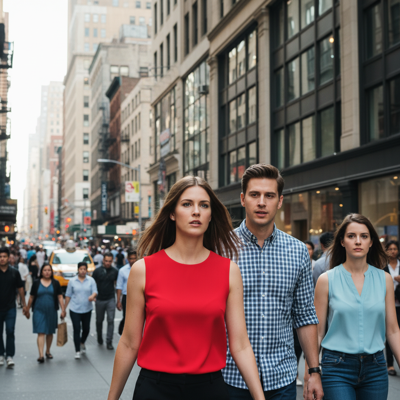

In [30]:
# Open image
generated_image = Image.open(BytesIO(response.candidates[0].content.parts[0].inline_data.data))


# Display at smaller size (thumbnail)
display(generated_image.resize((400, 400)))

## Query

**Image1:**

In [43]:
# reasoning=True is default for Moondream 3
display(Markdown(f' **Reasoning (`True`)**: {model.query(encoded_image1, "What woman in a blue blouse is doing?", settings=settings)["reasoning"]["text"]}'))
display(Markdown(f' **Reasoning (`False`)**: {model.query(encoded_image1, "What woman in a blue blouse is doing?", settings=settings, reasoning=False)["answer"]}'))

 **Reasoning (`True`)**: The woman on the right side of the image is walking and looking back over her shoulder with a slight smile. She appears to be engaged in a casual conversation or observing something in her surroundings.

 **Reasoning (`False`)**: The woman in a blue blouse is walking down the street, looking back at the camera.

In [44]:
# Response structure if reasoning is enabled
model.query(encoded_image1, "What woman in a blue blouse is doing?", settings=settings)

{'reasoning': {'text': 'The woman on the right side of the image is walking and looking back over her shoulder with a slight smile. She appears to be engaged in a casual conversation or observing something in her surroundings.',
  'grounding': []},
 'answer': 'The woman on the right is walking and looking back over her shoulder with a slight smile.'}

In [46]:
settings2 = {"Temperature": 0.1}
display(Markdown(f' **Reasoning (`True`)**: {model.query(encoded_image1, "What woman in a blue blouse is doing?", settings=settings2)["reasoning"]["text"]}'))

 **Reasoning (`True`)**: The woman on the right is walking and looking back over her shoulder, appearing to be engaged with the man beside her.

**Image2:**

*How many workers are visible?*

In [69]:
point_result_img2 = model.query(encoded_image2, "How many workers are visible?", settings=settings2) # settings2 - Temperature: 0.1
point_result_img2

{'reasoning': {'text': 'The image shows three visible workers. They are wearing bright orange safety vests and appear to be inspecting or working at the site. One worker is near the tree, while two others are standing further away from the tree.',
  'grounding': [{'start_idx': 16,
    'end_idx': 37,
    'points': [(0.6044921875, 0.8525390625),
     (0.7255859375, 0.865234375),
     (0.806640625, 0.875)]}]},
 'answer': '3'}

In [99]:
point_result_img2["reasoning"]["text"][16:37]

'three visible workers'

In [80]:
for point in point_result_img2["reasoning"]["grounding"][0]["points"]:
  print(point[0])

0.6044921875
0.7255859375
0.806640625


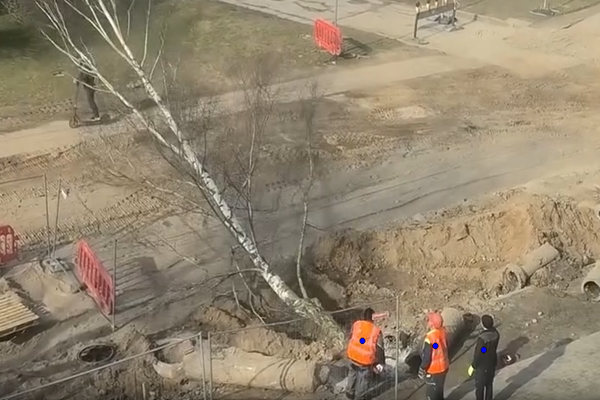

In [82]:
image2_copy1 = image2.copy()
draw = ImageDraw.Draw(image2_copy1)

# Set point size
radius = 5

# Draw each point
for point in point_result_img2["reasoning"]["grounding"][0]["points"]:
    x = int(point[0] * width2)
    y = int(point[1] * height2)

    # Draw a small circle (dot)
    draw.ellipse([x - radius, y - radius, x + radius, y + radius], fill="blue", outline="black")

# Show the modified image
display(image2_copy1.resize((width1 // 2, height1 // 2)))  # Resize width and height by 50%. display works in Google Colab

*How many workers are without safety helmets?*

In [83]:
point_result2_img2 = model.query(encoded_image2, "How many workers are without safety helmets?", settings=settings2) # settings2 - Temperature: 0.1
point_result2_img2

{'reasoning': {'text': 'The image shows one worker without a safety helmet. This worker appears to be inspecting or working near the exposed tree and utility pipes at the construction site.',
  'grounding': [{'start_idx': 16,
    'end_idx': 50,
    'points': [(0.146484375, 0.1884765625)]}]},
 'answer': '1'}

In [98]:
point_result2_img2["reasoning"]["text"][16:50]

'one worker without a safety helmet'

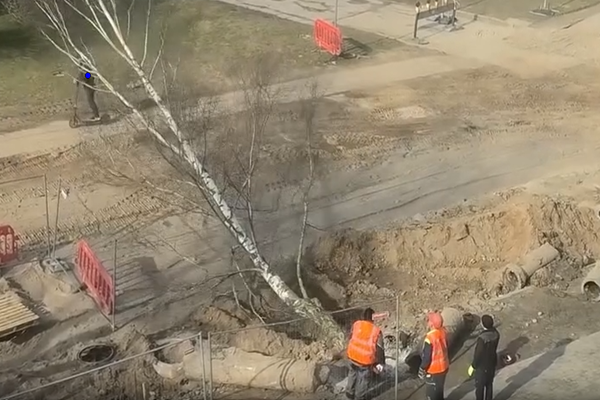

In [84]:
image2_copy2 = image2.copy()
draw = ImageDraw.Draw(image2_copy2)

# Set point size
radius = 5

# Draw each point
for point in point_result2_img2["reasoning"]["grounding"][0]["points"]:
    x = int(point[0] * width2)
    y = int(point[1] * height2)

    # Draw a small circle (dot)
    draw.ellipse([x - radius, y - radius, x + radius, y + radius], fill="blue", outline="black")

# Show the modified image
display(image2_copy2.resize((width1 // 2, height1 // 2)))  # Resize width and height by 50%. display works in Google Colab

*How many workers are visible? How many workers are with hats and how many are without safety helmets?*

In [89]:
point_result3_img2 = model.query(encoded_image2, "How many workers are visible? How many workers are with hats and how many are without safety helmets?", settings=settings2) # settings2 - Temperature: 0.1
point_result3_img2

{'reasoning': {'text': 'The image shows two workers with hats and one worker without a safety helmet.',
  'grounding': [{'start_idx': 16,
    'end_idx': 37,
    'points': [(0.6044921875, 0.8525390625), (0.7255859375, 0.865234375)]},
   {'start_idx': 42, 'end_idx': 76, 'points': [(0.8095703125, 0.875)]}]},
 'answer': '2 with hats, 1 without'}

In [100]:
display(Markdown(point_result3_img2["reasoning"]["text"][16:37]))
display(Markdown(point_result3_img2["reasoning"]["text"][42:76]))

two workers with hats

one worker without a safety helmet

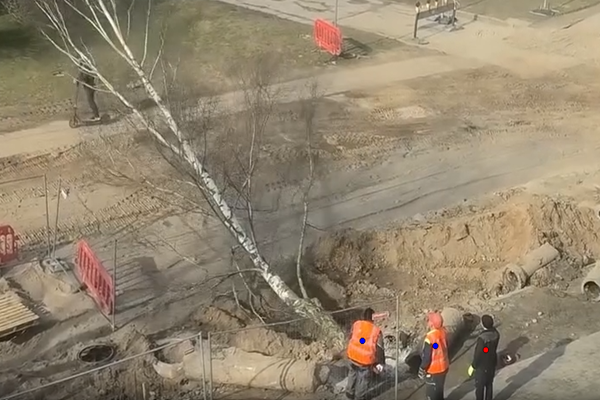

In [109]:
image2_copy5 = image2.copy()
draw = ImageDraw.Draw(image2_copy5)

# Set point size
radius = 5

# Draw each point
for idx, grounding in enumerate(point_result3_img2["reasoning"]["grounding"]):
    # Choose color based on group index
    if idx == 0:
        color = "blue"
    else:
        color = "red"

    # Draw each point in this group
    for point in grounding["points"]:
        x = int(point[0] * width2)
        y = int(point[1] * height2)
        draw.ellipse([x - radius, y - radius, x + radius, y + radius],
                     fill=color, outline="black")

# Show the modified image
display(image2_copy5.resize((width1 // 2, height1 // 2)))  # Resize width and height by 50%. display works in Google Colab

*How many workers are visible? How many workers are with safety helmets and how many are without safety helmets?*

In [92]:
point_result4_img2 = model.query(encoded_image2, "How many workers are visible? How many workers are with safety helmets and how many are without safety helmets?", settings=settings2) # settings2 - Temperature: 0.1
point_result4_img2

{'reasoning': {'text': 'The image shows three workers in total. One worker is wearing a safety helmet, while the other two are not wearing helmets. This aligns with the answer of 1 worker with a safety helmet and 2 workers without safety helmets.',
  'grounding': [{'start_idx': 16,
    'end_idx': 29,
    'points': [(0.6044921875, 0.8525390625),
     (0.7255859375, 0.865234375),
     (0.806640625, 0.875)]},
   {'start_idx': 40, 'end_idx': 77, 'points': [(0.744140625, 0.0361328125)]}]},
 'answer': '1 worker with a safety helmet, 2 workers without safety helmets'}

In [102]:
display(Markdown(point_result4_img2["reasoning"]["text"][16:29]))
display(Markdown(point_result4_img2["reasoning"]["text"][40:77]))

three workers

One worker is wearing a safety helmet

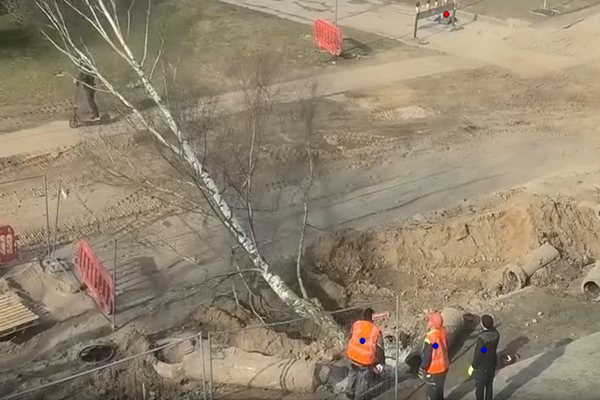

In [108]:
image2_copy4 = image2.copy()
draw = ImageDraw.Draw(image2_copy4)

# Set point size
radius = 5

# Draw each point
for idx, grounding in enumerate(point_result4_img2["reasoning"]["grounding"]):
    # Choose color based on group index
    if idx == 0:
        color = "blue"
    else:
        color = "red"

    # Draw each point in this group
    for point in grounding["points"]:
        x = int(point[0] * width2)
        y = int(point[1] * height2)
        draw.ellipse([x - radius, y - radius, x + radius, y + radius],
                     fill=color, outline="black")

# Show the modified image
display(image2_copy4.resize((width1 // 2, height1 // 2)))  # Resize width and height by 50%. display works in Google Colab

In [103]:
point_result5_img2 = model.query(encoded_image2, "How many workers are visible? How many workers are with safety helmets? Ho many workers are without safety helmets?", settings=settings2) # settings2 - Temperature: 0.1
point_result5_img2

{'reasoning': {'text': 'The image shows three workers. Some of them are wearing orange safety vests and hard hats, indicating they are wearing safety gear. However, only one worker is visibly wearing a safety helmet.',
  'grounding': [{'start_idx': 16,
    'end_idx': 29,
    'points': [(0.6044921875, 0.8525390625),
     (0.7255859375, 0.865234375),
     (0.806640625, 0.8837890625)]},
   {'start_idx': 141, 'end_idx': 191, 'points': [(0.146484375, 0.23046875)]}]},
 'answer': '3'}

In [105]:
display(Markdown(point_result5_img2["reasoning"]["text"][16:29]))
display(Markdown(point_result5_img2["reasoning"]["text"][141:191]))

three workers

only one worker is visibly wearing a safety helmet

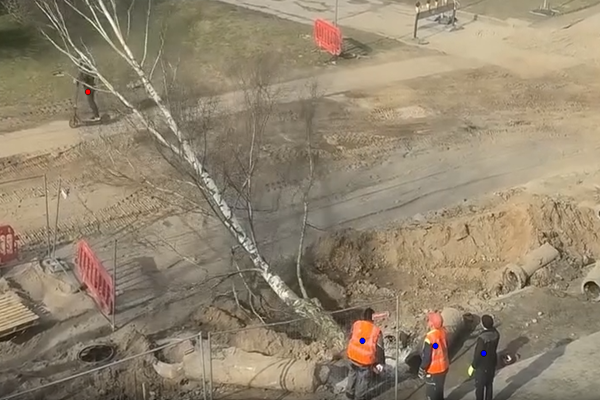

In [107]:
image2_copy3 = image2.copy()
draw = ImageDraw.Draw(image2_copy3)

# Set point size
radius = 5

# Draw each point
for idx, grounding in enumerate(point_result5_img2["reasoning"]["grounding"]):
    # Choose color based on group index
    if idx == 0:
        color = "blue"
    else:
        color = "red"

    # Draw each point in this group
    for point in grounding["points"]:
        x = int(point[0] * width2)
        y = int(point[1] * height2)
        draw.ellipse([x - radius, y - radius, x + radius, y + radius],
                     fill=color, outline="black")

# Show the modified image
display(image2_copy3.resize((width1 // 2, height1 // 2)))  # Resize width and height by 50%. display works in Google Colab

*Describe potential danger in this image.*

In [68]:
model.query(encoded_image2, "Describe potential danger in this image.", settings=settings2) # settings2 - Temperature: 0.1

{'reasoning': {'text': "The potential danger is the exposed tree root system near the utility access point. If the tree were to fall, it could damage the pipes and potentially injure workers or passersby. The workers' proximity to the tree and utility access suggests caution is needed.",
  'grounding': []},
 'answer': 'The potential danger is the exposed tree root system near the utility access point, which could cause damage to the pipes and pose a safety hazard to workers.'}

## Detect

**Image1:**

In [50]:
detect_result1 = model.detect(encoded_image1, "How many long haired women are in this picture?")
detect_result1

{'objects': [{'x_min': 0.1019916832447052,
   'y_min': 0.19663092494010925,
   'x_max': 0.4663676917552948,
   'y_max': 0.9908690750598907},
  {'x_min': 0.7333613783121109,
   'y_min': 0.26279816031455994,
   'x_max': 0.9209354966878891,
   'y_max': 0.9950143396854401}]}

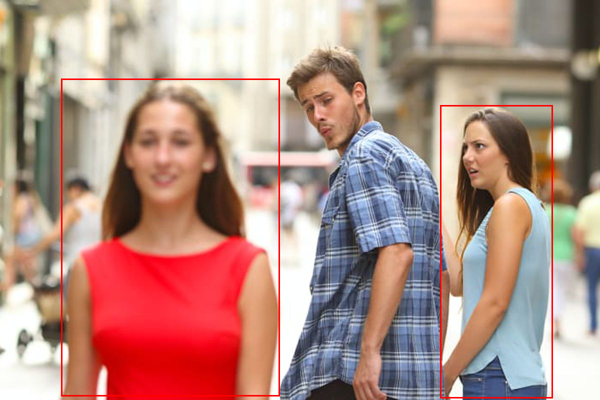

In [51]:
image1_copy = image1.copy()
draw = ImageDraw.Draw(image1_copy)

for obj in detect_result["objects"]:
    x_min = int(obj['x_min'] * width1)
    y_min = int(obj['y_min'] * height1)
    x_max = int(obj['x_max'] * width1)
    y_max = int(obj['y_max'] * height)

    # Draw rectangle (red, thickness 3)
    draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)

# Show the modified image
display(image1_copy)  # This works in Google Colab

**Image3:**

In [129]:
detect_result1_img3 = model.detect(encoded_image3, "How many workers are without safety helmets?")
detect_result1_img3

{'objects': [{'x_min': 0.5737584456801414,
   'y_min': 0.7680808529257774,
   'x_max': 0.6430384293198586,
   'y_max': 0.9994972720742226},
  {'x_min': 0.6920491829514503,
   'y_min': 0.7696382626891136,
   'x_max': 0.7493570670485497,
   'y_max': 0.9979398623108864},
  {'x_min': 0.7761849611997604,
   'y_min': 0.7815205156803131,
   'x_max': 0.8370962888002396,
   'y_max': 0.9977763593196869}]}

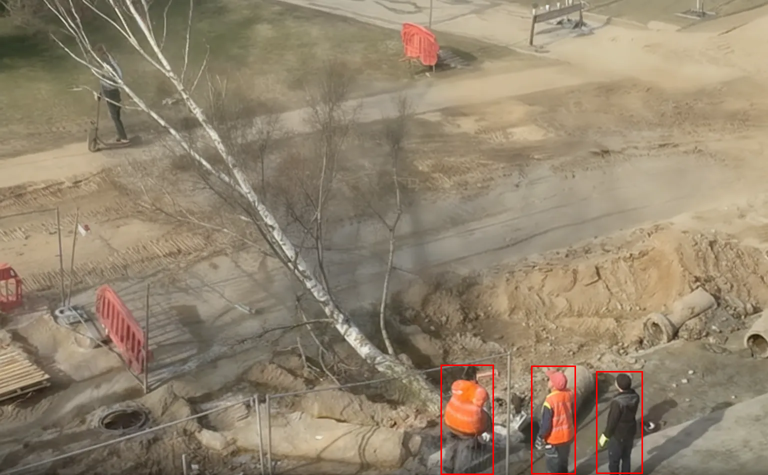

In [130]:
image3_copy1 = image3.copy()
draw = ImageDraw.Draw(image3_copy1)

for obj in detect_result1_img3["objects"]:
    x_min = int(obj['x_min'] * width3)
    y_min = int(obj['y_min'] * height3)
    x_max = int(obj['x_max'] * width3)
    y_max = int(obj['y_max'] * height3)

    # Draw rectangle (red, thickness 3)
    draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)

# Show the modified image
display(image3_copy1.resize((width3 // 2, height3 // 2)))  # Resize width and height by 50%. display works in Google Colab

## Point

**Image1:**

In [52]:
point_result1 = model.point(encoded_image1, "How many arms do you see in this picture?")
point_result1

{'points': [{'x': 0.134765625, 'y': 0.83203125},
  {'x': 0.4345703125, 'y': 0.83203125},
  {'x': 0.6396484375, 'y': 0.720703125},
  {'x': 0.744140625, 'y': 0.744140625},
  {'x': 0.7587890625, 'y': 0.6396484375},
  {'x': 0.83203125, 'y': 0.6708984375},
  {'x': 0.958984375, 'y': 0.5791015625},
  {'x': 0.099609375, 'y': 0.5595703125}]}

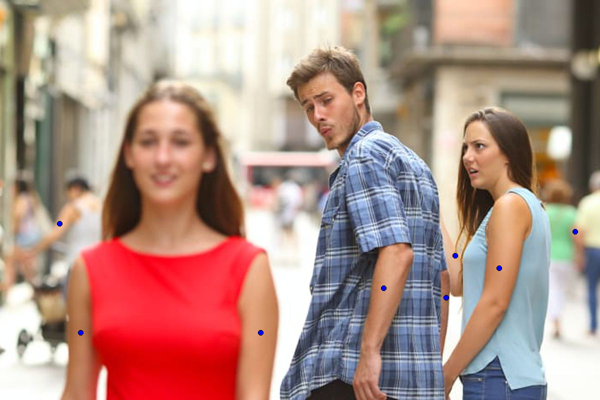

In [53]:
image2_copy = image1.copy()
draw = ImageDraw.Draw(image2_copy)

# Set point size
radius = 5

# Draw each point
for point in point_result1["points"]:
    x = int(point['x'] * width1)
    y = int(point['y'] * height1)

    # Draw a small circle (dot)
    draw.ellipse([x - radius, y - radius, x + radius, y + radius], fill="blue", outline="black")

# Show the modified image
display(image2_copy.resize((width1 // 2, height1 // 2)))  # Resize width and height by 50%. display works in Google Colab

**Image3:**

In [134]:
point_result1_img3 = model.point(encoded_image3, "Workers without helmets")
point_result1_img3

{'points': [{'x': 0.6083984375, 'y': 0.8525390625},
  {'x': 0.7265625, 'y': 0.865234375},
  {'x': 0.806640625, 'y': 0.865234375}]}

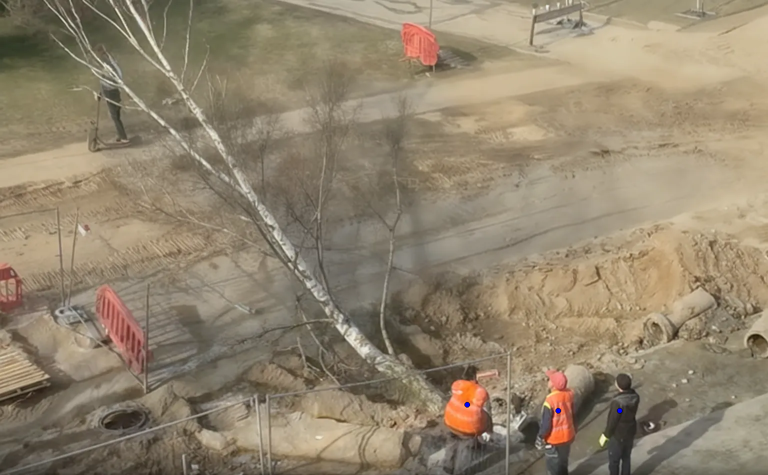

In [135]:
image3_copy2 = image3.copy()
draw = ImageDraw.Draw(image3_copy2)

# Set point size
radius = 5

# Draw each point
for point in point_result1_img3["points"]:
    x = int(point['x'] * width3)
    y = int(point['y'] * height3)

    # Draw a small circle (dot)
    draw.ellipse([x - radius, y - radius, x + radius, y + radius], fill="blue", outline="black")

# Show the modified image
display(image3_copy2.resize((width3 // 2, height3 // 2)))  # Resize width and height by 50%. display works in Google Colab

## OCR and structured output

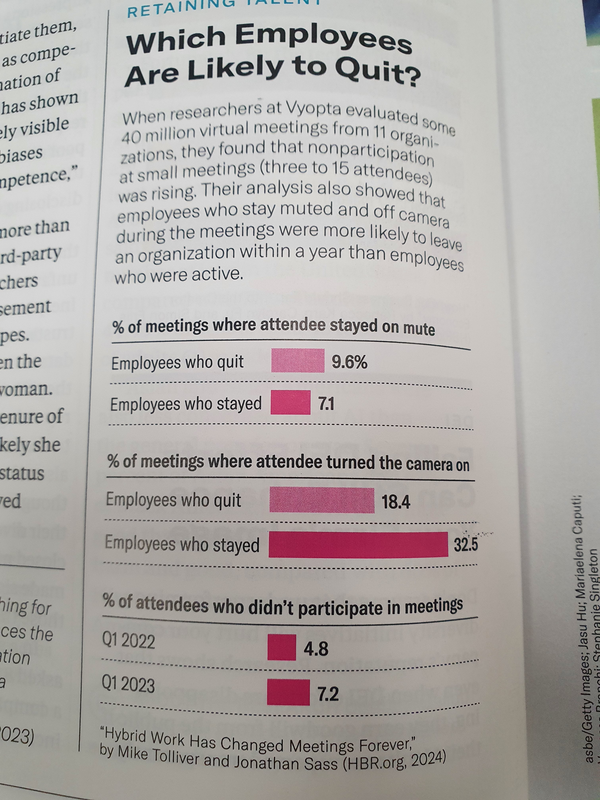

In [54]:
# Load image #2
url2 = 'https://raw.githubusercontent.com/aivisbr/diff_files/140bf2a6c89ee4f2fc1af43c94c42cd81557440f/20241011_102538.jpg'

response2 = requests.get(url2)

image2 = Image.open(BytesIO(response2.content))

# Resize while maintaining aspect ratio
base_width = 800  # Change this to your desired width
w_percent = base_width / float(image2.width)
h_size = int((float(image2.height) * float(w_percent)))
image2 = image2.resize((base_width, h_size), Image.Resampling.LANCZOS)

# Rotate the image 90 degrees counter-clockwise
image2 = image2.rotate(-90, expand=True) # expand=True to avoid cropping

display(image2)  # This works in Google Colab

encoded_image2 = model.encode_image(image2)

In [60]:
prompt2_old = "Extract survey questions, give categories of these questions and \
amount - how many respondents answered to this question. \
Return result in a JSON format. In the result include also data source."

model.query(encoded_image2, question=prompt2_old, settings=settings2) # settings2 - Temperature: 0.1

{'reasoning': {'text': 'The image presents survey data about employee retention. It doesn\'t directly ask "Which Employees Are Likely to Quit?" but rather categorizes employees based on whether they stayed on mute or turned the camera on. The image shows percentages of employees who quit and stayed, along with the percentage of meetings where attendees stayed on mute or turned the camera on.',
  'grounding': []},
 'answer': '{\n  "survey_questions": [\n    "Which Employees Are Likely to Quit?"\n  ],\n  "question_categories": [\n    "% of meetings where attendee stayed on mute",\n    "% of meetings where attendee turned the camera on",\n    "% of attendees who didn\'t participate in meetings"\n  ],\n  "amount": {\n    "Employees who quit": 18.4,\n    "Employees who stayed": 32.5\n  },\n  "data_source": "HBR.org"\n}'}

In [59]:
prompt2 = "Extract survey questions (text marked in the bold), \
give categories of these questions (2 options under the question) and \
amount - how many respondents (in %) answered to this question. \
Return result in a JSON format. \
In the result include also data source (text at the end of the image)."

model.query(encoded_image2, question=prompt2, settings=settings2) # settings2 - Temperature: 0.1

{'reasoning': {'text': 'The image presents survey questions about employee retention. The bolded text indicates the questions. I need to extract the categories and amounts. The categories are "Employees who quit" and "Employees who stayed". The amounts are 9.6% and 7.1% respectively. The source is mentioned at the bottom: "Hybrid Work Has Changed Meetings Forever," by Mike Tolliver and Jonathan Sass (HBR.org, 2024).',
  'grounding': []},
 'answer': '{\n  "question_1": "Which Employees Are Likely to Quit?",\n  "question_2": "Employees who stayed on mute",\n  "question_2_amount": "7.1%",\n  "question_3": "Employees who stayed on camera",\n  "question_3_amount": "32.5%",\n  "question_4": "Employees who didn\'t participate in meetings",\n  "question_4_amount": "7.2%",\n  "source": "Hybrid Work Has Changed Meetings Forever,\\nby Mike Tolliver and Jonathan Sass (HBR.org, 2024)"\n}'}

In [61]:
prompt3 = "Extract text from this image. Output result in the JSON format."

model.query(encoded_image2, question=prompt3, settings=settings2) # settings2 - Temperature: 0.1

{'reasoning': {'text': 'I need to extract all the text from the image and format it as a JSON object. Important to not put the JSON inside a string.',
  'grounding': []},
 'answer': '{\n  "title": "Which Employees Are Likely to Quit?",\n  "introduction": "When researchers at Vyopta evaluated some 40 million virtual meetings from 11 organizations, they found that nonparticipation at small meetings (three to 15 attendees) was rising. Their analysis also showed that employees who stay muted and off camera during the meetings were more likely to leave an organization within a year than employees who were active.",\n  "key_metrics": [\n    {\n      "category": "% of meetings where attendee stayed on mute",\n      "employees_who_quit": "9.6%",\n      "employees_who_stayed": "7.1%"\n    },\n    {\n      "category": "% of meetings where attendee turned the camera on",\n      "employees_who_quit": "18.4%",\n      "employees_who_stayed": "32.5%"\n    },\n    {\n      "category": "% of attendees 

In [110]:
from importlib.metadata import version
from IPython.display import Markdown, display # pip install ipython
import sys

packages = ['accelerate', 'google-genai', 'huggingface-hub', 'Pillow', 'requests', 'torch', 'transformers']

text = f"Python version: {sys.version}\n\n"
for i in packages:
    text += f"[{i}](https://pypi.org/project/{i}/) version: {version(i)}\n\n"
display(Markdown(text))

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]

[accelerate](https://pypi.org/project/accelerate/) version: 1.10.1

[google-genai](https://pypi.org/project/google-genai/) version: 1.38.0

[huggingface-hub](https://pypi.org/project/huggingface-hub/) version: 0.35.0

[Pillow](https://pypi.org/project/Pillow/) version: 11.3.0

[requests](https://pypi.org/project/requests/) version: 2.32.4

[torch](https://pypi.org/project/torch/) version: 2.8.0+cu126

[transformers](https://pypi.org/project/transformers/) version: 4.56.1

